Вам представлены данные об оттоке клиентов некоторого банка.

In [200]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()
copy_churn_data=churn_data.copy()

Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)   
CustomerId — идентификатор клиента   
Surname — фамилия клиента    
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)    
Geography — страна клиента (банк международный)   
Gender — пол клиента    
Age — возраст клиента     
Tenure — сколько лет клиент пользуется услугами банка     
Balance — баланс на счетах клиента в банке    
NumOfProducts — количество услуг банка, которые приобрёл клиент     
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)      
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)     
EstimatedSalary — предполагаемая заработная плата клиента     
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)     

Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента. 

In [201]:
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
churn_data = churn_data.drop(['RowNumber'], axis=1)

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [202]:

df_exited = churn_data['Exited'].value_counts()
fig = go.Figure(
    data=[go.Pie(labels=['Лояльные клиенты', 'Клиентов ушло'],
    values=df_exited, 
    hole=.3, 
    pull=.1)]
)
fig.show()

Из общего числа клиентов 10000: 2037 (20.4%) клиентов были потерянны банком, остальные 7963 (79.6%) сохраняют свою лояльность

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [203]:

hist_df=churn_data[churn_data['Balance']>2500]
print(hist_df.shape[0])
fig=px.histogram(
    data_frame= hist_df,
    x='Balance',
    title='Распределение баланса на счетах клиентов более 2500$'
)
fig.update_traces(hoverinfo="all", hovertemplate="Баланс: %{x}<br>Клиентов: %{y}")
fig.show()


6383


Из графика распределения баланса можно сделать вывод, что в основном клиенты предпочитают размещать на счетах суммы от 75000 до 158000$. Пик(самое большое количество клиентов) 190 человек имеет на балансе сумму 122000-124000$. Распределение баланса ниже 50000 и выше 200000 незначительно от 20-50 клиентов.    
3617 клиентов имеют баланс ниже 2500 $ и анализу не подлежали 

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

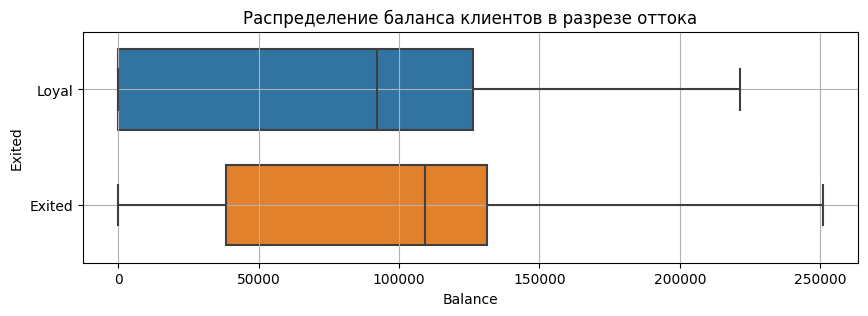

In [204]:
churn_data['Exited'] = churn_data['Exited'].astype('category') 
churn_data['Exited'] = churn_data['Exited'].cat.rename_categories({
    1 : 'Exited',
    0 : 'Loyal'
})
fig=plt.figure(figsize=(10,3))
boxplot=sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.7
)
boxplot.set_title('Распределение баланса клиентов в разрезе оттока')
boxplot.grid()


Ушедшие клиенты хранят на счетах меньшие суммы, средняя сумма не превышает 100000, максимальная сумма не превышает 225000. Тогда как средняя сумма у активных клиентов более 110000, а максимальная более 250000. Возможно это связанно с невыгодными условиями по вкладам на суммы менее 100000$

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

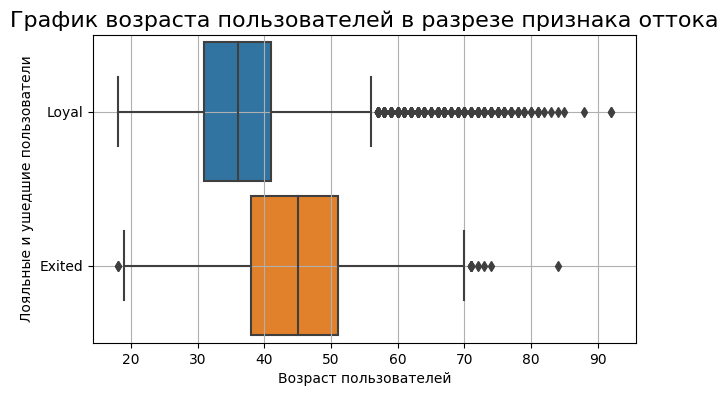

In [205]:
fig = plt.figure(figsize=(7, 4))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('График возраста пользователей в разрезе признака оттока', fontsize=16);
boxplot.set_xlabel('Возраст пользователей');
boxplot.set_ylabel('Лояльные и ушедшие пользователи');
boxplot.grid()

Наибольшая часть ушедших клиентов банка старше 40 лет, на данную возрастную группу стоит обратить наибольшее внимание. Наибольшее количество выбросов в группе лояльных клиентов старше 60 лет.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [206]:
fig = px.scatter(
    data_frame=churn_data,
    x = 'CreditScore',
    y = 'EstimatedSalary',
    color='Exited',
    width=1100,
    height=600,
    title='Взаимосвязь кредитного рейтинга и предполагаемой зарплаты клиентов'
)
fig.show()

Явной взаимосвязи между кредитным рейтингом и предполагаемой зарплатой клиентов не прослеживается. Высоким уровнем зарплаты и кредитным рейтингом обладают как лояльные так и ушедшие клиенты.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

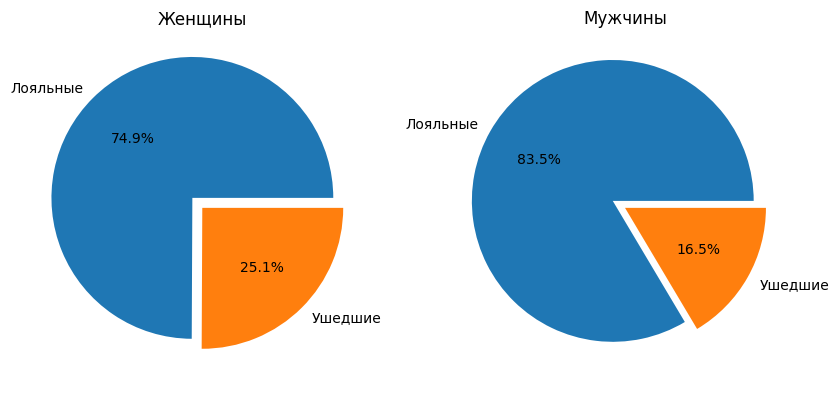

In [230]:
df_ex=churn_data.groupby('Gender')['Exited'].value_counts(normalize=True).unstack()
df_ex = df_ex.T
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes[0].pie(
    df_ex['Female'],
    labels = ['Лояльные','Ушедшие'],
    autopct='%.1f%%',
    explode=[0.1, 0]
);
axes[0].set_title('Женщины');

axes[1].pie(
    df_ex['Male'],
    labels = ['Лояльные','Ушедшие'],
    autopct='%.1f%%',
    explode=[0.1, 0]
);
axes[1].set_title('Мужчины');


В числе клиентов банка преобладают мужчины, так же они остаются наиболее лояльными клиентами, т.к. доля ушедших женщин по отношению к их общему числу значительно выше чем доля ушедших мужчин.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

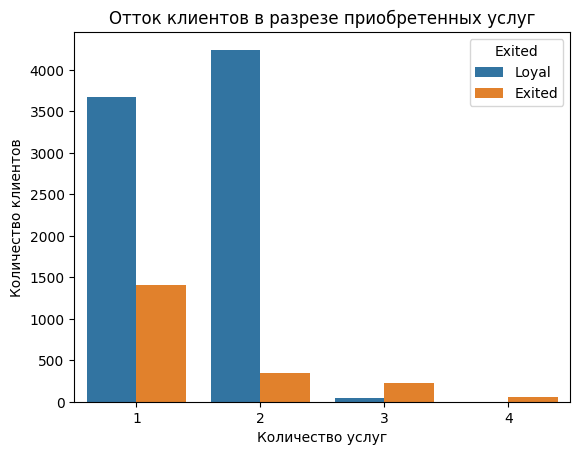

In [227]:
fig=sns.countplot(
        data=churn_data, 
        x="NumOfProducts",
        hue="Exited")
fig.set_title('Отток клиентов в разрезе приобретенных услуг')
fig.set_xlabel('Количество услуг')
fig.set_ylabel('Количество клиентов');

К наиболее лояльным клиентам можно отнести клиентов приобретавших 2 услуги банка, таких клиентов большинство. Клиенты приобретавшие более 2 услуг почти полностью теряют лояльность.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

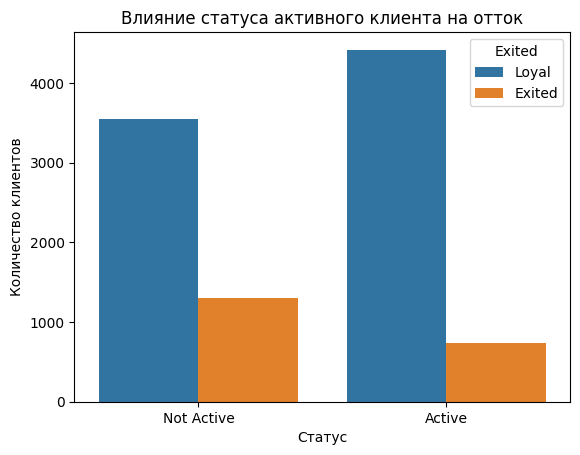

In [228]:
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].astype('category') 
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].cat.rename_categories({
    1 : 'Active',
    0 : 'Not Active'
})
fig=sns.countplot(
        data=churn_data, 
        x="IsActiveMember",
        hue="Exited")
fig.set_title('Влияние статуса активного клиента на отток')
fig.set_xlabel('Статус')
fig.set_ylabel('Количество клиентов');

Доля ушедших не активных клиентов значительно выше, чем доля ушедших активных клиентов. Из этого следует, что банку необходимо разрабатывать и внедрять продукты и предложения, позволяющие привлечь клиентов к активности.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.


In [210]:
country_data = copy_churn_data.groupby('Geography', as_index=False)['Exited'].mean()
fig = px.choropleth(data_frame = country_data,
                    locations = 'Geography',
                    locationmode = 'country names',
                    color = 'Exited',
                    range_color = [0, 0.4],
                    title = 'Отток клиентов по странам',
                    width = 800,
                    height = 500,
                    color_continuous_scale = 'Reds'
)
fig.show()

Наибольшая доля ушедших клиентов в Германии, это может быть связанно с наличием на рынке этой страны более выгодных предложений от местных или других банков. В Испании и Франции доли ушедших примерно одинаковы и скорее всего не зависят от географии 

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.   
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

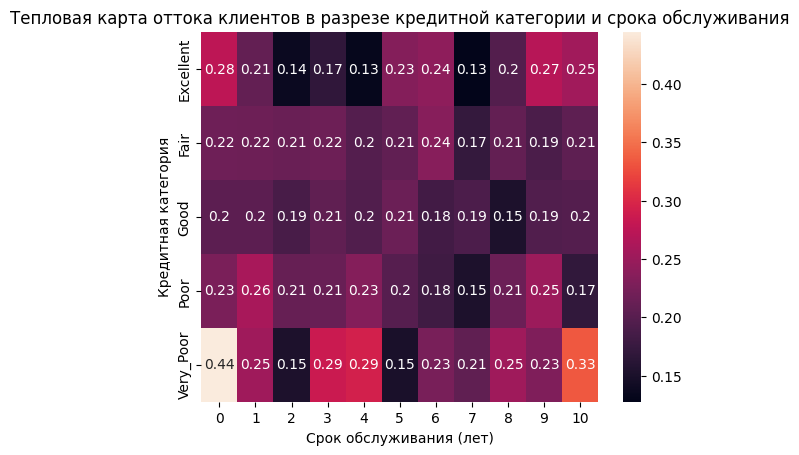

In [237]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
copy_churn_data['CreditScore']=copy_churn_data['CreditScore'].astype('category')
copy_churn_data['CreditScoreCat']=copy_churn_data['CreditScore'].apply(get_credit_score_cat)
pivot_data=copy_churn_data.pivot_table(
    index='CreditScoreCat',
    columns='Tenure',
    values='Exited',
    aggfunc='mean'
)
fig=sns.heatmap(pivot_data, annot=True);
fig.set_title('Тепловая карта оттока клиентов в разрезе кредитной категории и срока обслуживания')
fig.set_xlabel('Срок обслуживания (лет)')
fig.set_ylabel('Кредитная категория');



Чаще всего уходят клиенты первого года обслуживания с низкой кредитной категорией, а так же клиенты обслуживающиеся более 10 лет той же категории. Наиболее лояльными клиентами остаются клиенты категорий Poor, Good и Fair на протяжении всего срока обслаживания.